<a href="https://colab.research.google.com/github/Hecvv/RANO-metrics/blob/main/TFG_DEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Subir los archivos
from google.colab import files 
uploaded = files.upload()

Saving enhancing.nii.gz to enhancing.nii.gz


In [2]:
from google.colab import files 
uploaded = files.upload()

Saving T1C.nii.gz to T1C.nii.gz


In [3]:
# Leer las imágenes
import nibabel as nib
I = nib.load('enhancing.nii.gz') # read image
T = nib.load('T1C.nii.gz') # read image

In [4]:
#Acceder a la data en el objeto NIfTI
I_data = I.get_fdata()
type(I_data)
I_data
I_data.shape

(240, 240, 155)

In [5]:
T_data = T.get_fdata()
type(T_data)
T_data
T_data.shape

(240, 240, 155)

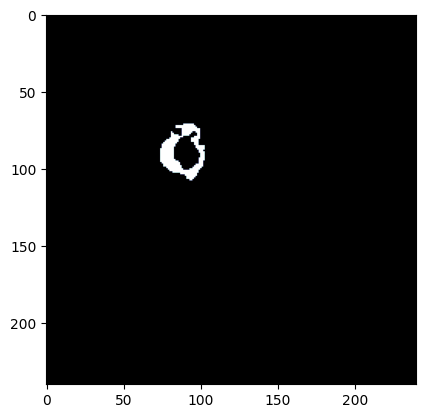

In [25]:
#Primera vista desde MRIcroGL, axial -XxYx114mm (XxYx114)
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
plt.imshow(ndi.rotate(I_data[:,:,114],-90), cmap='bone')
plt.show()

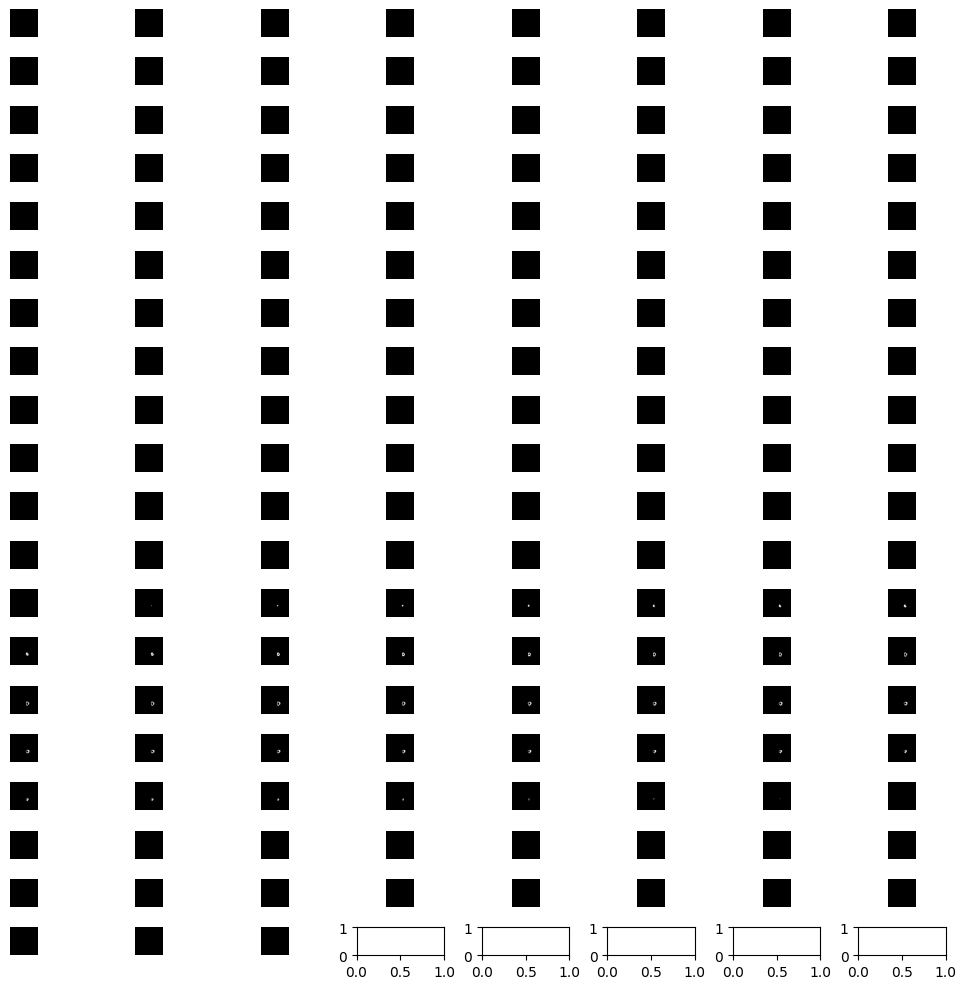

In [6]:
#Visualización de todas las slices del plano axial
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
fig_rows = 20
fig_cols = 8
n_subplots = 155
n_slice = I_data.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(I_data[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')
plt.tight_layout()
plt.show()

Distancia máxima entre voxels que no pasan por 0: 26.0
Voxels que forman la distancia máxima: ([158, 76], [158, 102])


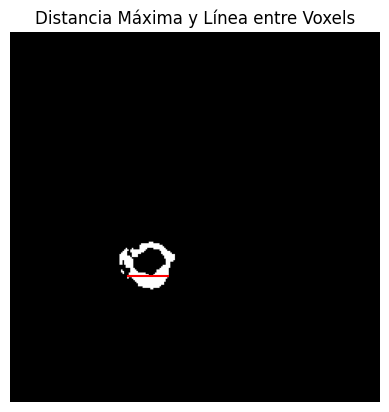

Resolución espacial: (1.0, 1.0, 1.0)
Distancia en milímetros: 26.0


In [6]:
# Obtención del diámetro máximo sin pasar por 0
# Para escoger la slice con la distancia máxima se pueden visualizar todas las slices con el código de visualización anterior y guiarte a ojo de las que podrían ser
# Luego vas probando una por una entre esas.
import numpy as np

# Obtener la slice deseada
slice_index = 115  # Índice de la slice deseada
slice_data = I_data[:, :, slice_index]

# Obtener los voxels que no pasan por 0
nonzero_voxels = np.nonzero(slice_data)

# Calcular la distancia máxima entre los voxels no nulos
max_distance1 = -np.inf
max_distance_vector1 = None
for i in range(len(nonzero_voxels[0])):
    for j in range(i+1, len(nonzero_voxels[0])):
        distance = np.sqrt((nonzero_voxels[0][i] - nonzero_voxels[0][j])**2 + (nonzero_voxels[1][i] - nonzero_voxels[1][j])**2)
        # Comprobar si algún voxel en la distancia calculada pasa por cero
        if np.any(slice_data[min(nonzero_voxels[0][i], nonzero_voxels[0][j]):max(nonzero_voxels[0][i], nonzero_voxels[0][j])+1,
                        min(nonzero_voxels[1][i], nonzero_voxels[1][j]):max(nonzero_voxels[1][i], nonzero_voxels[1][j])+1] == 0):
            continue
        if distance > max_distance1:
            max_distance1 = distance
            max_distance_vector1 = [nonzero_voxels[0][i], nonzero_voxels[1][i]], [nonzero_voxels[0][j], nonzero_voxels[1][j]]

# Imprimir la distancia máxima obtenida
print("Distancia máxima entre voxels que no pasan por 0:", max_distance1)
print("Voxels que forman la distancia máxima:", max_distance_vector1)

import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
plt.imshow(slice_data, cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector1[0]
x2, y2 = max_distance_vector1[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()


# Obtener la resolución espacial en milímetros
resolucion = I.header.get_zooms()  # Se obtienen los valores de las dimensiones x, y, z
print("Resolución espacial:", resolucion)

# Definir una distancia en voxels
distancia_voxels1 = max_distance1 

# Convertir la distancia de voxels a milímetros
distancia_milimetros = distancia_voxels1 * resolucion[2]

print("Distancia en milímetros:", distancia_milimetros)

Distancia máxima entre voxels que no pasan por 0: 35.73513677041127
Voxels que forman la distancia máxima: ([144, 106], [155, 72])


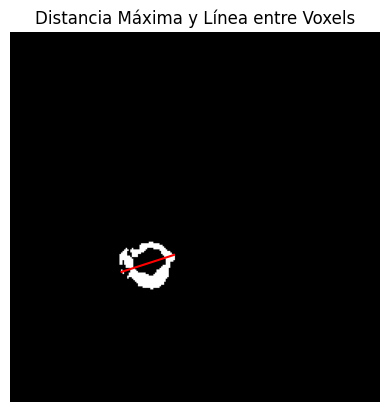

Resolución espacial: (1.0, 1.0, 1.0)
Distancia en milímetros: 35.73513677041127


In [7]:
# Para escoger la slice con la distancia máxima se pueden visualizar todas las slices con el código de visualización anterior y guiarte a ojo de las que podrían ser
# Luego vas probando una por una entre esas.
import nibabel as nib
import numpy as np

# Obtener la slice deseada
slice_index = 115  # Índice de la slice deseada
slice_data = I_data[:, :, slice_index]

# Obtener los voxels que no pasan por 0
nonzero_voxels = np.nonzero(slice_data)

# Calcular la distancia máxima entre los voxels no nulos
max_distance2 = -np.inf
max_distance_vector2 = None
for i in range(len(nonzero_voxels[0])):
    for j in range(i+1, len(nonzero_voxels[0])):
        distance = np.sqrt((nonzero_voxels[0][i] - nonzero_voxels[0][j])**2 + (nonzero_voxels[1][i] - nonzero_voxels[1][j])**2)
        if distance > max_distance2:
            max_distance2 = distance
            max_distance_vector2 = [nonzero_voxels[0][i], nonzero_voxels[1][i]], [nonzero_voxels[0][j], nonzero_voxels[1][j]]
# Imprimir la distancia máxima obtenida
print("Distancia máxima entre voxels que no pasan por 0:", max_distance2)
print("Voxels que forman la distancia máxima:", max_distance_vector2)


import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
plt.imshow(slice_data, cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector2[0]
x2, y2 = max_distance_vector2[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()


# Obtener la resolución espacial en milímetros
resolucion = I.header.get_zooms()  # Se obtienen los valores de las dimensiones x, y, z
print("Resolución espacial:", resolucion)

# Definir una distancia en voxels
distancia_voxels2 = max_distance2 

# Convertir la distancia de voxels a milímetros
distancia_milimetros = distancia_voxels2 * resolucion[2]

print("Distancia en milímetros:", distancia_milimetros)


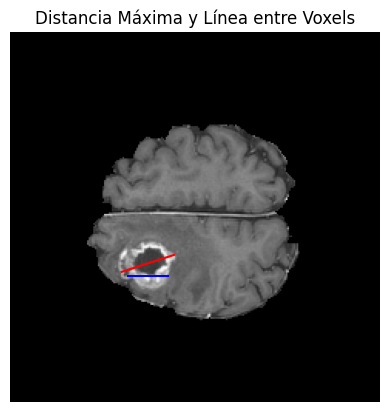

In [12]:
# Superposición con T1C
import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
slice_index1 = 115
plt.imshow(T.get_fdata()[:, :, slice_index1], cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector2[0]
x2, y2 = max_distance_vector2[1]
z1, w1 = max_distance_vector1[0]
z2, w2 = max_distance_vector1[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')
plt.plot([w1, w2], [z1, z2], 'b')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()


In [13]:
from google.colab import files 
uploaded = files.upload()

Saving OUTPUT_FILE.nii.gz to OUTPUT_FILE.nii.gz


In [19]:
from google.colab import files 
uploaded = files.upload()

Saving FLAIR.nii.gz to FLAIR.nii.gz


In [20]:
import nibabel as nib
P = nib.load('OUTPUT_FILE.nii.gz') # read image
F = nib.load('FLAIR.nii.gz') # read image

In [21]:
#Acces data in the NIfTI object
P_data = P.get_fdata()
type(P_data)
P_data
P_data.shape

(240, 240, 155)

In [22]:
F_data = F.get_fdata()
type(F_data)
F_data
F_data.shape

(240, 240, 155)

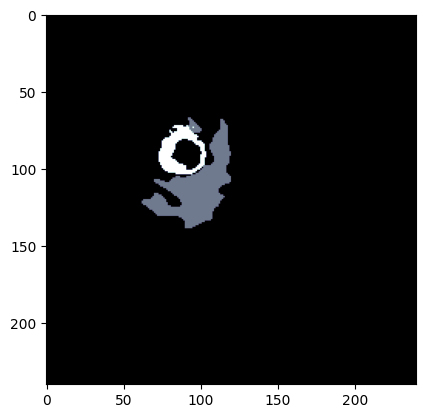

In [90]:
#Primera vista desde MRIcroGL, axial -XxYx118mm (XxYx118)
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
plt.imshow(ndi.rotate(P_data[:,:,118],-90), cmap='bone')
plt.show()

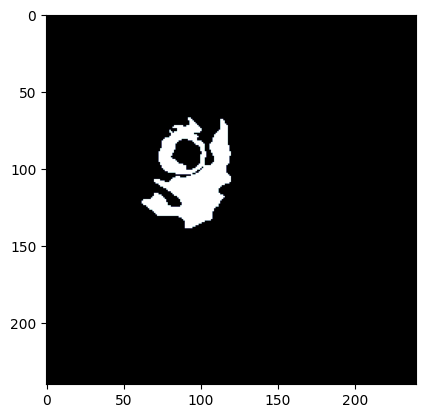

In [15]:
# BINARIZACIÓN OPCIONAL
#import nibabel as nib
#import matplotlib.pyplot as plt
#import numpy as np
#import scipy.ndimage as ndi
# Binarizar la imagen
#threshold = 0.5  # Umbral para binarizar la imagen
#binary_data = np.where(P_data >= threshold, 1, 0)

# Crear un nuevo archivo NIfTI binarizado
#binary_nifti = nib.Nifti1Image(binary_data, I.affine)

# Guardar el archivo NIfTI binarizado
#nib.save(binary_nifti, 'P_bin.nii.gz')

#P = nib.load('P_bin.nii.gz')

# Obtener los datos de la imagen
#P_data = P.get_fdata()

#plt.imshow(ndi.rotate(P_data[:,:,118],-90), cmap='bone')
#plt.show()

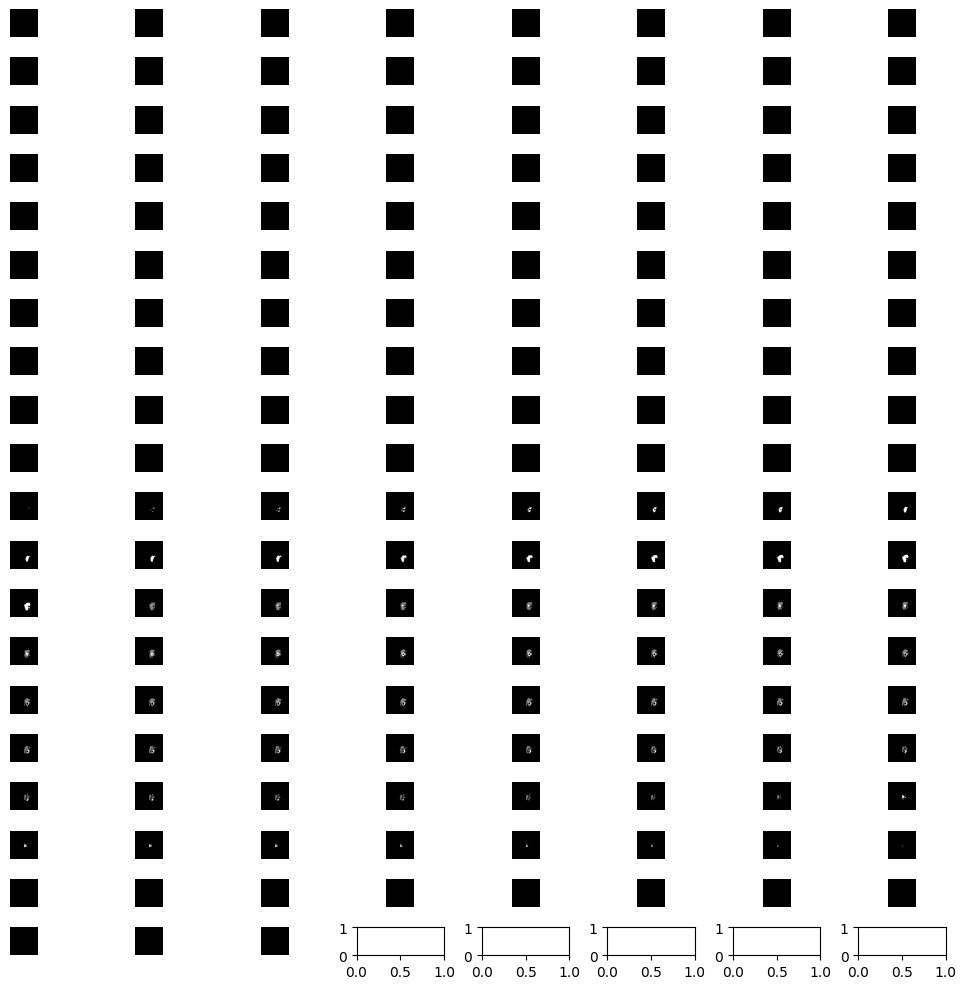

In [52]:
# Visualización de todas las slices del plano axial
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
fig_rows = 20
fig_cols = 8
n_subplots = 155
n_slice = P_data.shape[2]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(P_data[:, :, img], 90), cmap='gray')
    axs.flat[idx].axis('off')
plt.tight_layout()
plt.show()

Distancia máxima entre voxels que no pasan por 0: 54.0
Voxels que forman la distancia máxima: ([128, 67], [128, 121])


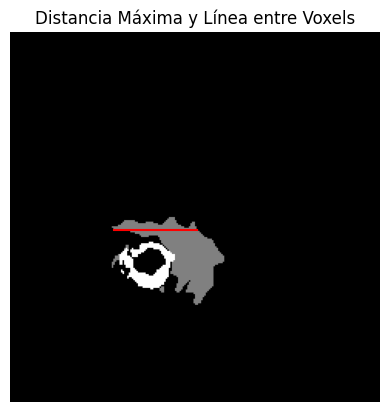

Resolución espacial: (1.0, 1.0, 1.0)
Distancia en milímetros: 54.0


In [16]:
# Obtención del diámetro máximo sin pasar por 0
import numpy as np

# Obtener la slice deseada
slice_index = 115  # Índice de la slice deseada
slice_data = P_data[:, :, slice_index]

# Obtener los voxels que no pasan por 0
nonzero_voxels = np.nonzero(slice_data)

# Calcular la distancia máxima entre los voxels no nulos
max_distance1 = -np.inf
max_distance_vector1 = None
for i in range(len(nonzero_voxels[0])):
    for j in range(i+1, len(nonzero_voxels[0])):
        distance = np.sqrt((nonzero_voxels[0][i] - nonzero_voxels[0][j])**2 + (nonzero_voxels[1][i] - nonzero_voxels[1][j])**2)
        # Comprobar si algún voxel en la distancia calculada pasa por cero
        if np.any(slice_data[min(nonzero_voxels[0][i], nonzero_voxels[0][j]):max(nonzero_voxels[0][i], nonzero_voxels[0][j])+1,
                        min(nonzero_voxels[1][i], nonzero_voxels[1][j]):max(nonzero_voxels[1][i], nonzero_voxels[1][j])+1] == 0):
            continue
        if distance > max_distance1:
            max_distance1 = distance
            max_distance_vector1 = [nonzero_voxels[0][i], nonzero_voxels[1][i]], [nonzero_voxels[0][j], nonzero_voxels[1][j]]

# Imprimir la distancia máxima obtenida
print("Distancia máxima entre voxels que no pasan por 0:", max_distance1)
print("Voxels que forman la distancia máxima:", max_distance_vector1)

import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
plt.imshow(slice_data, cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector1[0]
x2, y2 = max_distance_vector1[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()


# Obtener la resolución espacial en milímetros
resolucion = P.header.get_zooms()  # Se obtienen los valores de las dimensiones x, y, z
print("Resolución espacial:", resolucion)

# Definir una distancia en voxels
distancia_voxels1 = max_distance1 

# Convertir la distancia de voxels a milímetros
distancia_milimetros = distancia_voxels1 * resolucion[2]

print("Distancia en milímetros:", distancia_milimetros)

Distancia máxima entre voxels que no pasan por 0: 75.29276193632427
Voxels que forman la distancia máxima: ([126, 66], [164, 131])


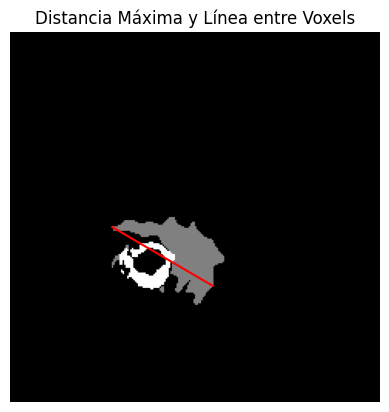

Resolución espacial: (1.0, 1.0, 1.0)
Distancia en milímetros: 75.29276193632427


In [17]:
# Obtención del diámetro máximo pasando por 0
import nibabel as nib
import numpy as np

# Obtener la slice deseada
slice_index = 115  # Índice de la slice deseada
slice_data = P_data[:, :, slice_index]

# Obtener los voxels que no pasan por 0
nonzero_voxels = np.nonzero(slice_data)

# Calcular la distancia máxima entre los voxels no nulos
max_distance2 = -np.inf
max_distance_vector2 = None
for i in range(len(nonzero_voxels[0])):
    for j in range(i+1, len(nonzero_voxels[0])):
        distance = np.sqrt((nonzero_voxels[0][i] - nonzero_voxels[0][j])**2 + (nonzero_voxels[1][i] - nonzero_voxels[1][j])**2)
        if distance > max_distance2:
            max_distance2 = distance
            max_distance_vector2 = [nonzero_voxels[0][i], nonzero_voxels[1][i]], [nonzero_voxels[0][j], nonzero_voxels[1][j]]
# Imprimir la distancia máxima obtenida
print("Distancia máxima entre voxels que no pasan por 0:", max_distance2)
print("Voxels que forman la distancia máxima:", max_distance_vector2)


import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
plt.imshow(slice_data, cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector2[0]
x2, y2 = max_distance_vector2[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()


# Obtener la resolución espacial en milímetros
resolucion = P.header.get_zooms()  # Se obtienen los valores de las dimensiones x, y, z
print("Resolución espacial:", resolucion)

# Definir una distancia en voxels
distancia_voxels2 = max_distance2 

# Convertir la distancia de voxels a milímetros
distancia_milimetros = distancia_voxels2 * resolucion[2]

print("Distancia en milímetros:", distancia_milimetros)

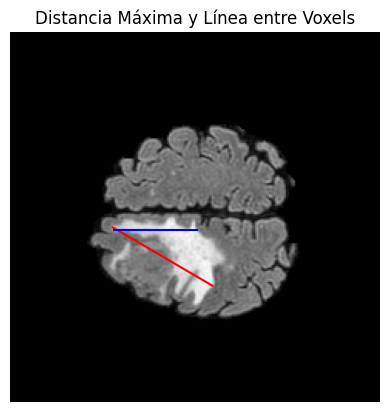

In [23]:
# Superposición con FLAIR
import matplotlib.pyplot as plt

# Dibujar la imagen de la slice
slice_index1 = 115
plt.imshow(F.get_fdata()[:, :, slice_index1], cmap='gray')

# Obtener las coordenadas de los voxels que forman la línea
x1, y1 = max_distance_vector2[0]
x2, y2 = max_distance_vector2[1]
z1, w1 = max_distance_vector1[0]
z2, w2 = max_distance_vector1[1]

# Dibujar la línea entre los dos voxels
plt.plot([y1, y2], [x1, x2], 'r')
plt.plot([w1, w2], [z1, z2], 'b')

# Configurar los ejes y el título de la figura
plt.axis('off')
plt.title('Distancia Máxima y Línea entre Voxels')

# Mostrar la figura
plt.show()